In [72]:
import numpy as np
import math
import pandas as pd
from datetime import datetime, timedelta, date
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [73]:
# [Truck Name, Truck capacity in Tonns, A , n]

Truck_list = [["A_5_Tonns_truck", 5, 251.45, 0.315],
              ["B_7_Tonns_truck", 7, 292.94, 0.316],
              ["C_9_Tonns_truck", 9, 382.15, 0.343],
              ["D_16_Tonns_truck", 16, 668.39, 0.38]]

sorter_guide = []
max_truck_capacity = 0
for i in range(len(Truck_list)):
    sorter_guide.append([i,int(Truck_list[i][1])])
    if int(Truck_list[i][1])>=max_truck_capacity:
        max_truck_capacity = int(Truck_list[i][1])
sorter_guide = np.array(sorter_guide)
sorter_guide = sorter_guide[sorter_guide[:,1].argsort()[::-1]]
sorter_temp = []
for i in range(len(sorter_guide)):
    sorter_temp.append(Truck_list[sorter_guide[i][0]])
Truck_list = np.array(sorter_temp)   

print('\n',"max_truck_capacity =",max_truck_capacity,'\n')
Truck_list


 max_truck_capacity = 16 



array([['D_16_Tonns_truck', '16', '668.39', '0.38'],
       ['C_9_Tonns_truck', '9', '382.15', '0.343'],
       ['B_7_Tonns_truck', '7', '292.94', '0.316'],
       ['A_5_Tonns_truck', '5', '251.45', '0.315']], dtype='<U32')

In [74]:
from math import sin, cos, sqrt, atan2, radians

def Distance_calculator(lat1,lon1,lat2,lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

  
    return distance



In [75]:
def CW_truck_assignment(locations_list,weights_list,vr_status):
    
    
    distance_matrix = [[Distance_calculator(locations_list[i][0],locations_list[i][1],locations_list[j][0],locations_list[i][1]) for i in range(len(locations_list))] for j in range(len(locations_list))]
    distance_matrix = np.array(distance_matrix)
    

    cw_savings_matrix = [[(distance_matrix[0][i+1]+distance_matrix[0][j+1]-min(distance_matrix[0][i+1],distance_matrix[0][j+1])-distance_matrix[i+1][j+1]) for i in range(len(locations_list)-1)] for j in range(len(locations_list)-1)]
    if vr_status == True:
        savings_threshold = 0.42
    else:
        savings_threshold = 0.5

    cw_savings_percent_matrix = [[((distance_matrix[0][i+1]+distance_matrix[0][j+1]-min(distance_matrix[0][i+1],distance_matrix[0][j+1])-distance_matrix[i+1][j+1])/(distance_matrix[0][i+1]+distance_matrix[0][j+1])) for i in range(len(locations_list)-1)] for j in range(len(locations_list)-1)]
    
    cw_savings_matrix = np.array(cw_savings_matrix)
    for i in range(len(cw_savings_matrix)):
        cw_savings_matrix[i][i]=0
   
    for i in range(len(cw_savings_percent_matrix)):
        cw_savings_percent_matrix[i][i]=0
   
    cw_savings_list=[]

    for i in range(len(cw_savings_matrix)):
        j=0
        while j<i:
            if cw_savings_percent_matrix[i][j]>=savings_threshold:
                cw_savings_list.append([i+1,j+1,cw_savings_matrix[i][j]])
            j=j+1
    cw_savings_list=np.array(cw_savings_list)
    
    if(len(cw_savings_list)>0):
        cw_savings_list=cw_savings_list[cw_savings_list[:,2].argsort()[::-1]]

    truck_assignment_cw_savings = []

    for i in range(len(cw_savings_list)):
        truck_assignment_cw_savings.append([cw_savings_list[i][0],cw_savings_list[i][1],cw_savings_list[i][2],0,0,0])

    truck_assignment_cw_savings = np.array(truck_assignment_cw_savings)
    
    truck_assignment_matrix = np.zeros((len(weights_list), len(weights_list)))
    truck_assigned_weights = np.zeros((len(weights_list)))
    truck_assigned_savings = np.zeros((len(weights_list)))

  

    truck_count=0

    for i in range(len(truck_assignment_cw_savings)):
       
        loc1 = int(truck_assignment_cw_savings[i][0])
        loc2 = int(truck_assignment_cw_savings[i][1])
        truck_no =0

        if truck_assignment_cw_savings[i][3]==0 and truck_assignment_cw_savings[i][4]==0:
            
            if weights_list[int(loc1-1)]+weights_list[int(loc2-1)]<=max_truck_capacity:
                truck_no = truck_count
                truck_count = truck_count+1
                truck_assignment_matrix[int(loc1-1)][int(truck_no)]=1
                truck_assignment_matrix[int(loc2-1)][int(truck_no)]=1
               
                truck_assignment_cw_savings[i][3]=1
                truck_assignment_cw_savings[i][4]=1
                truck_assignment_cw_savings[i][5]=truck_no+1
                truck_assigned_savings[int(truck_no)] = truck_assigned_savings[int(truck_no)]+truck_assignment_cw_savings[i][2]

                for j in range(len(truck_assignment_cw_savings)):
                    if truck_assignment_cw_savings[j][0]==loc1 or truck_assignment_cw_savings[j][1]==loc1:
                        if truck_assignment_cw_savings[j][0]==loc1:
                            truck_assignment_cw_savings[j][3]=1
                            truck_assignment_cw_savings[j][5]=truck_no+1
                        else:
                            truck_assignment_cw_savings[j][4]=1
                            truck_assignment_cw_savings[j][5]=truck_no+1

                    if truck_assignment_cw_savings[j][0]==loc2 or truck_assignment_cw_savings[j][1]==loc2:
                        if truck_assignment_cw_savings[j][0]==loc2:
                            truck_assignment_cw_savings[j][3]=1
                            truck_assignment_cw_savings[j][5]=truck_no+1
                        else:
                            truck_assignment_cw_savings[j][4]=1
                            truck_assignment_cw_savings[j][5]=truck_no+1

        elif truck_assignment_cw_savings[i][3]==1 and truck_assignment_cw_savings[i][4]==1:
            null=0
        elif truck_assignment_cw_savings[i][3]+truck_assignment_cw_savings[i][4]==1:
          
            truck_no = truck_assignment_cw_savings[i][5]-1

            if truck_assignment_cw_savings[i][3]==0:
                loc1 = truck_assignment_cw_savings[i][0]
            else:
                loc1 = truck_assignment_cw_savings[i][1]


            if truck_assigned_weights[int(truck_no)]+weights_list[int(loc1-1)]<=max_truck_capacity:
               
                truck_assignment_matrix[int(loc1-1)][int(truck_no)]=1
               
                truck_assignment_cw_savings[i][3]=1
                truck_assignment_cw_savings[i][4]=1
                truck_assigned_savings[int(truck_no)] = truck_assigned_savings[int(truck_no)]+truck_assignment_cw_savings[i][2]
                for j in range(len(truck_assignment_cw_savings)):
                    if truck_assignment_cw_savings[j][0]==loc1 or truck_assignment_cw_savings[j][1]==loc1:
                        if truck_assignment_cw_savings[j][0]==loc1:
                            truck_assignment_cw_savings[j][3]=1
                            truck_assignment_cw_savings[j][5]=truck_no+1
                        else:
                            truck_assignment_cw_savings[j][4]=1
                            truck_assignment_cw_savings[j][5]=truck_no+1

        for i in range(truck_count):
            current_wt = 0
            for j in range(len(weights_list)):
                current_wt = current_wt+truck_assignment_matrix[j][i]*weights_list[j]
            truck_assigned_weights[i]=current_wt
    
    dummy_no = 0
    for i in range(len(truck_assignment_matrix)):
        assigned = 0
        for j in range(len(weights_list)):
            assigned = assigned + truck_assignment_matrix[i][j]
        if assigned == 1:
           
            dummy_no =+ 1
        elif assigned >1:
  
            dummy_no =+ 1
        elif assigned ==0:
           
            truck_assignment_matrix[i][int(truck_count)]=1
            truck_count=truck_count+1

    for i in range(truck_count):
        current_wt = 0
        for j in range(len(weights_list)):
            current_wt = current_wt+truck_assignment_matrix[j][i]*weights_list[j]
        truck_assigned_weights[i]=current_wt


    truck_assigned_distances = np.zeros((len(weights_list)))

    for i in range(len(truck_assigned_distances)):
        for j in range(len(truck_assignment_matrix)):
            if truck_assignment_matrix[j][i]==1:
                truck_assigned_distances[i]=truck_assigned_distances[i]+distance_matrix[j+1][0]
        truck_assigned_distances[i]=truck_assigned_distances[i]-truck_assigned_savings[i]

   
    truck_assigned_type = np.zeros((len(weights_list)))

    for i in range(len(truck_assigned_distances)):
        for j in range(len(Truck_list)):
            if(truck_assigned_weights[i]>0 and truck_assigned_weights[i]<=int(Truck_list[j][1])):
                truck_assigned_type[i] = j+1
    
    truck_type_counter = []
    
    for p in range(len(Truck_list)):
        count = 0
        for j in range(len(truck_assigned_type)):
            if truck_assigned_type[j] == p+1:
                count = count +1
        truck_type_counter.append(count)

    truck_costs = np.zeros((len(weights_list)))

    for i in range(len(truck_costs)):
        if truck_assigned_type[i]>0 and truck_assigned_distances[i]>0:
            k=int(truck_assigned_type[i]-1)
            truck_costs[i]=round(float(truck_assigned_distances[i])*float(Truck_list[k][2])*(float(truck_assigned_distances[i])**(float(Truck_list[k][3])*-1)),1)


    return(sum(truck_costs),truck_count,truck_type_counter)

In [76]:
shipmentsdata = pd.read_csv('C:\\Users\\Admin\\Downloads\\Routing_Data.csv')

print(shipmentsdata.describe())
shipmentsdata


        Latitude   Longitude      Weight
count  925.00000  925.000000  925.000000
mean    21.82441   78.006303    7.394624
std      5.58326    4.663323    3.636307
min      8.50000   70.070000    3.209305
25%     18.51960   73.855300    5.642999
50%     22.54110   77.230000    6.347921
75%     26.84700   80.275000    6.974645
max     34.09110   91.770000   14.995551


,Date,City,Latitude,Longitude,Weight
0,04-01-2020,Delhi,28.6600,77.2300,6.025515
1,25-04-2020,Mumbai,18.9667,72.8333,14.766201
2,10-03-2020,Delhi,28.6600,77.2300,14.624218
3,15-05-2020,Delhi,28.6600,77.2300,12.139311
4,15-08-2020,Indore,22.7206,75.8472,6.468847
...,...,...,...,...,...
920,23-06-2020,Ulhasnagar,19.2167,73.1500,6.918289
921,10-12-2019,Hyderabad,17.3667,78.4667,5.793844
922,31-01-2020,Cawnpore,26.4725,80.3311,5.701604
923,20-10-2020,Pune,18.5196,73.8553,12.544136


,Weight
City,
Delhi,969.073407
Mumbai,732.356738
Kolkata,517.853935
Bangalore,350.260731
Chennai,326.694288
...,...
Kochi,6.183410
Bhubaneshwar,6.078471
Hubli,5.719229


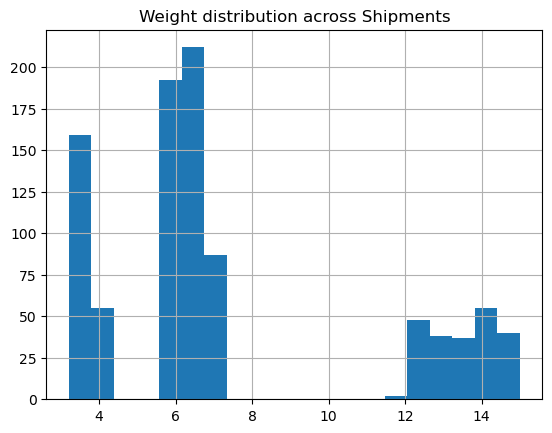

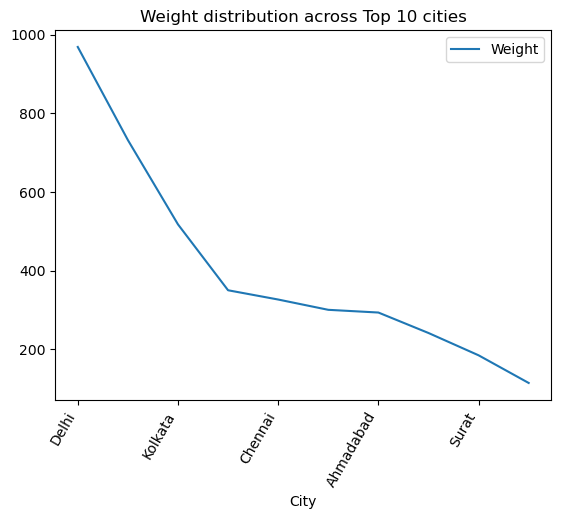

In [77]:
shipmentsdata['Weight'].hist(bins=20)
plt.title('Weight distribution across Shipments')

city_display = pd.DataFrame(shipmentsdata.groupby(['City'], as_index=False)['Weight'].sum())
city_display.set_index('City',inplace=True)

city_display = city_display.sort_values(by='Weight', ascending=False)
city_display.head(10).plot(title='Weight distribution across Top 10 cities')
plt.xticks(rotation=60, ha='right')



city_display

In [78]:
import pandas as pd
from datetime import timedelta


dda = shipmentsdata.groupby(['Date', 'City', 'Latitude', 'Longitude'], as_index=False)['Weight'].sum()


split_shipments = []

# Iterate over each row of the DataFrame dda
for i, row in dda.iterrows():
  
    if row['Weight'] > max_truck_capacity:
        remainder = row['Weight'] % max_truck_capacity
        no_of_splits = int((row['Weight'] - remainder) / max_truck_capacity)
        
      
        dda.loc[i, 'Weight'] = remainder
        
        for _ in range(no_of_splits):
            split_shipments.append(row.to_dict())


shipmentsdata_new = pd.concat([dda] + [pd.DataFrame(split_shipments)], ignore_index=True)


shipmentsdata_new['Date'] = pd.to_datetime(shipmentsdata_new['Date'], format='%d-%m-%Y')


source_Latitude_list = shipmentsdata['Latitude'].tolist()
source_Longitude_list = shipmentsdata['Longitude'].tolist()
weights_list = shipmentsdata['Weight'].tolist()
source_dates = shipmentsdata['Date'].tolist()

delta = timedelta(days=1)
no_of_days = int((max(shipmentsdata_new['Date']) - min(shipmentsdata_new['Date'])).days + 1)


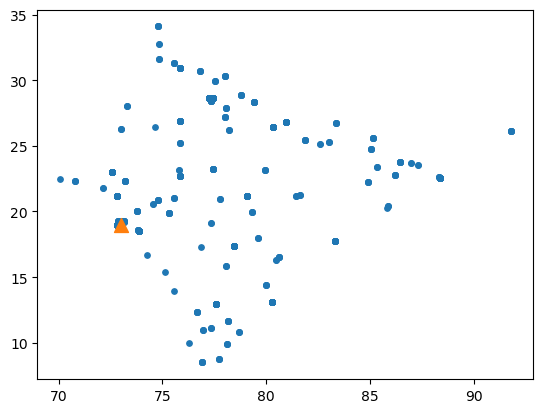

In [79]:
source_coordinates = [19,73]
planning_horizon = 1     
plt.scatter(shipmentsdata_new['Longitude'],shipmentsdata_new['Latitude'] ,marker='o', s = 15)
plt.scatter(source_coordinates[1],source_coordinates[0], marker = '^', s = 100)

___Result :- 

Estimated Cost with no Vehicle Routing: 19401674.0
Estimated Cost with Vehicle Routing: 18631811.0 

Estimated Cost Savings with Vehicle Routing: 4.0 % 

No. of Trucks with no VR: 872
No. of Trucks with VR: 809


<Axes: xlabel='Capacity in Tonne'>

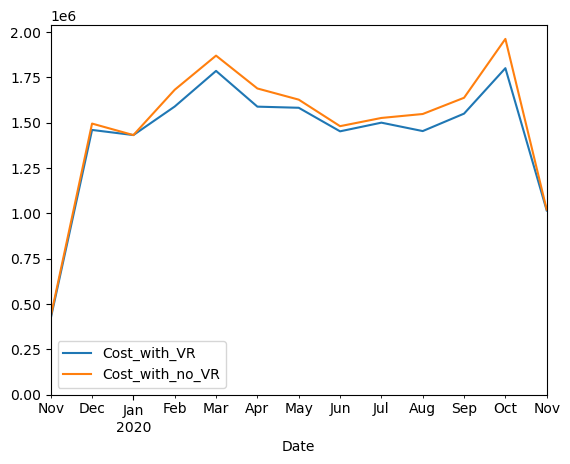

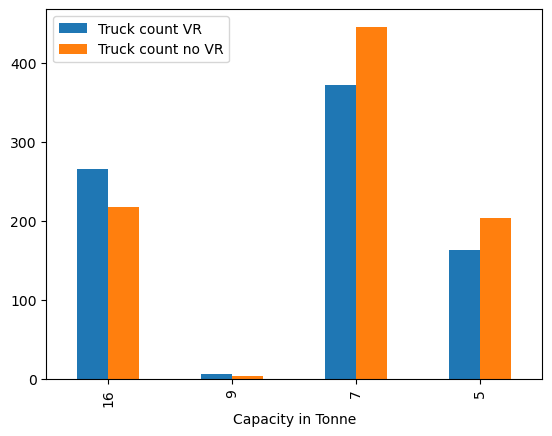

In [80]:
result_matrix = []
truck_type_total_count_VR = []
for p in range(len(Truck_list)):
    truck_type_total_count_VR.append(0)

truck_type_total_count_noVR = []
for p in range(len(Truck_list)):
    truck_type_total_count_noVR.append(0)

truck_type_total_count_VR = np.array(truck_type_total_count_VR)
truck_type_total_count_noVR = np.array(truck_type_total_count_noVR)


for j in range(0,no_of_days,planning_horizon):
    
    clear_output(wait=True)
    print("____Simulation Progress :",round(100*j/no_of_days,1),"%")
    weights_temp = []
    locations_temp = [[source_coordinates[0],source_coordinates[1]]]
    range_start = min(shipmentsdata_new['Date'])+j*delta
    range_end = min(shipmentsdata_new['Date'])+(j+planning_horizon)*delta
    
    rslt_df = shipmentsdata_new[shipmentsdata_new['Date'] >= range_start]
    rslt_df = rslt_df[rslt_df['Date'] < range_end]
   
    
    
    for i in range(len(rslt_df)):
        locations_temp.append([rslt_df.iloc[i]['Latitude'],rslt_df.iloc[i]['Longitude']])
        weights_temp.append(rslt_df.iloc[i]['Weight'])
    if len(locations_temp)>1:
        result_output_vr = CW_truck_assignment(locations_temp,weights_temp,True)
        result_output_no_vr = CW_truck_assignment(locations_temp,weights_temp,False)
        result_matrix.append([range_start,result_output_vr[0],result_output_no_vr[0]])
        truck_type_total_count_VR = np.add(truck_type_total_count_VR, np.array(result_output_vr[2]))
        truck_type_total_count_noVR = np.add(truck_type_total_count_noVR, np.array(result_output_no_vr[2]))
    
clear_output(wait=True)
result_matrix

df = pd.DataFrame(result_matrix, columns=['Date', 'Cost_with_VR', 'Cost_with_no_VR'])
df = df.set_index('Date')

Truck_list_table = pd.DataFrame(Truck_list, columns=['Name','Capacity in Tonne','A','n'])
Truck_list_table['Truck count VR'] = pd.Series(truck_type_total_count_VR)
Truck_list_table['Truck count no VR'] = pd.Series(truck_type_total_count_noVR)


print("___Result :-",'\n')
print("Estimated Cost with no Vehicle Routing:",round(sum(df['Cost_with_no_VR']),0))
print("Estimated Cost with Vehicle Routing:",round(sum(df['Cost_with_VR']),0),'\n')
#print('\n')
print("Estimated Cost Savings with Vehicle Routing:",round((sum(df['Cost_with_no_VR'])-sum(df['Cost_with_VR']))*100/sum(df['Cost_with_no_VR']),1),"%",'\n')
print("No. of Trucks with no VR:",sum(Truck_list_table['Truck count no VR']))
print("No. of Trucks with VR:",sum(Truck_list_table['Truck count VR']))

df.resample('M').sum().plot().axis([None, None, 0, None])
Truck_list_table.plot.bar(x='Capacity in Tonne')
 